In [166]:
from final_exam_first_cell import *

# question 1 (still incorrect)

# there are many ways to end up with exactly 3 replaced phones:
# all 15 submitted under warranty; 3/15 replaced
# 14 submitted, 3/14 replaced
# 13 submitted, 3/13 replaced
# ...
# 3 submitted, all 3 replaced

warranty_dist = stats.binom(15, 0.23)

sum_probs = 0

for phones_under_warranty in range(3, 15 + 1):
    # probability that this many phones were submitted for service while under warranty
    warranty_prob = warranty_dist.pmf(phones_under_warranty)
    print("probability that", phones_under_warranty, "phones are under warranty = %0.4f" % warranty_prob)
    
    # probability that this many phones of the ones in service were replaced
    replaced_dist = stats.binom(phones_under_warranty, 0.3)
    replaced_prob = replaced_dist.pmf(3)
    print("probability that 3 out of", phones_under_warranty, "phones are under warranty = %0.4f" % replaced_prob)
    
    # total probability (AND --> times)
    total_prob = warranty_prob * replaced_prob
    print("probability that this scenario occured, resulting in 3 phones replaced = %0.4f" % total_prob)
    sum_probs += total_prob
    
print("------------------------------------------")
print("probability that 3/15 phones were replaced under warranty:", sum_probs)
    

probability that 3 phones are under warranty = 0.2405
probability that 3 out of 3 phones are under warranty = 0.0270
probability that this scenario occured, resulting in 3 phones replaced = 0.0065
probability that 4 phones are under warranty = 0.2155
probability that 3 out of 4 phones are under warranty = 0.0756
probability that this scenario occured, resulting in 3 phones replaced = 0.0163
probability that 5 phones are under warranty = 0.1416
probability that 3 out of 5 phones are under warranty = 0.1323
probability that this scenario occured, resulting in 3 phones replaced = 0.0187
probability that 6 phones are under warranty = 0.0705
probability that 3 out of 6 phones are under warranty = 0.1852
probability that this scenario occured, resulting in 3 phones replaced = 0.0131
probability that 7 phones are under warranty = 0.0271
probability that 3 out of 7 phones are under warranty = 0.2269
probability that this scenario occured, resulting in 3 phones replaced = 0.0061
probability tha

In [3]:
three_dead_phones = stats.norm.cdf(3)
print("1)", three_dead_phones)

1) 0.9986501019683699


In [15]:
# question 2 (still incorrect)
sigma = 10
H0 = 74
n = 25

sd_below_mean = (74 - 72.3) / 10
print("2a) %0.2f" % sd_below_mean)

2a) 0.17


In [13]:
# question 3 (correct)
n = 115
ndof = n - 1
x_bar = 0.88
S = 0.30
sem = S / np.sqrt(n)
CI = 0.99
alpha = 1 - CI

critical_values = stats.t.interval(CI, ndof, loc=x_bar, scale=sem)
print("3) %0.3f, %0.3f" % critical_values)

3) 0.807, 0.953


In [18]:
# question 4 (still incorrect)
n = 100
x_bar_a = 50
S = 0.9
ndof = n - 1

prob_a = stats.t.cdf(50.1, ndof, x_bar_a, S) - stats.t.cdf(49.9, ndof, x_bar_a, S)
print("4a) %0.3f" % prob_a)

x_bar_b = 49.8
prob_b = stats.t.cdf(50.1, ndof, x_bar_b, S) - stats.t.cdf(49.9, ndof, x_bar_b, S)
print("4b) %0.3f" % prob_b)

4a) 0.088
4b) 0.086


In [160]:
# question 5...

alpha = 0.01
z = stats.norm.ppf(1 - alpha/2, 0, 1)

print("z = %0.2f" % z)

z = 2.58


In [52]:
# question 6 (correct)

depressive = 21
other = 27
brain_damaged = 25
groups = 3
SS_total = 1124.59
MS_groups = 76.26
alpha = 0.01

N = depressive + other + brain_damaged

v_total = N - 1
v_depressive = depressive - 1
v_brain_damaged = brain_damaged - 1
v_other = other - 1
v_treatment = N - 3
v_groups = groups - 1
v_error = v_total - v_groups

print("v_groups: %0.2f" % (v_groups))
print("v_error: %0.2f, v_total: %0.2f" % (v_error, v_total))

SS_groups = MS_groups * v_groups
print("SS_groups:"" %0.2f" % SS_groups)

SS_error = SS_total - SS_groups
print("SS_error: %0.2f" % SS_error)

MS_error = SS_error / v_error
print("MS_error: %0.2f" % MS_error)

fSN = MS_groups / MS_error
print ("F Signal/Noise = %0.2f " % fSN)

fdist = stats.f(v_groups,v_error)

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

# Print table
print()
print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Groups     %0.0f       %0.2f            %0.2f       %0.2f    %0.4f" %(v_groups,SS_groups,MS_groups,fSN,pvalue))
print ("Error      %0.0f      %0.2f            %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f     %0.2f" %(v_total,SS_total))

# Reject the null hypothesis, there are significant differences between the means.

v_groups: 2.00
v_error: 70.00, v_total: 72.00
SS_groups: 152.52
SS_error: 972.07
MS_error: 13.89
F Signal/Noise = 5.49 
Pvalue = 0.006

Source     df     Sum of Squares Mean Square     f     P-value
Groups     2       152.52            76.26       5.49    0.0061
Error      70      972.07            13.89
Total      72     1124.59


In [75]:
# question 7 (correct)

SS_total = 3460.00
SS_treatment = 28.14
SS_subjects = 2952.38
treatments = 3
subjects = 20
alpha = 0.05

SS_error = SS_total - (SS_treatment + SS_subjects)
print("SS_error = %0.2f" % SS_error)

v_treatment = treatments - 1
v_subjects = subjects - 1
print("v_treatment = %i" % v_treatment)
print("v_subjects = %i" % v_subjects)

N = treatments * subjects
v_total = N - 1
print("v_total = %i" % v_total)

v_error = v_total - v_treatment - v_subjects
print("v_error = %i" % v_error)

MS_treatment = SS_treatment / v_treatment
print("MS_treatment: %0.2f" % MS_treatment)

MS_subjects = SS_subjects / v_subjects
print("MS_subjects: %0.2f" % MS_subjects)

MS_error = SS_error / v_error
print("MS_error: %0.2f" % MS_error)

fSN_treatment = MS_treatment / MS_error
print ("F Signal/Noise Treatments = %0.2f " % fSN_treatment)

fSN_subjects = MS_subjects / MS_error
print ("F Signal/Noise Subjects = %0.2f " % fSN_subjects)

fdist_treatment = stats.f(v_treatment,v_error)

if (fSN_treatment > 1):
    pvalue_treatment = (1-fdist_treatment.cdf(fSN_treatment))
else:
    pvalue_treatment = fdist_treatment.cdf(fSN_treatment)
    
print ("Pvalue Treatment = %0.3f" % (pvalue_treatment))

# Print table
print()
print ("Source     df     Sum of Squares      Mean Square     f     P-value")
print ("Groups     %0.0f         %0.2f            %0.2f        %0.2f     %0.4f" %(v_treatment,SS_treatment,MS_treatment,fSN_treatment,pvalue_treatment))
print ("Subjects   %0.0f       %0.2f           %0.2f       %0.2f" %(v_subjects,SS_subjects,MS_subjects,fSN_subjects))
print ("Error      %0.0f       %0.2f            %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

# p-value is large --> Fail to reject the null hypothesis, there is no dependence in true average adaptation and the treatment given.
# fSN_subjects is large --> Yes, fB is quite large, suggesting great variability between subjects.

SS_error = 479.48
v_treatment = 2
v_subjects = 19
v_total = 59
v_error = 38
MS_treatment: 14.07
MS_subjects: 155.39
MS_error: 12.62
F Signal/Noise Treatments = 1.12 
F Signal/Noise Subjects = 12.31 
Pvalue Treatment = 0.338

Source     df     Sum of Squares      Mean Square     f     P-value
Groups     2         28.14            14.07        1.12    0.3384
Subjects   19       2952.38           155.39       12.31
Error      38       479.48            12.62
Total      59       3460.00


In [102]:
# question 8: ANOVA (correct)

SS_a = 30255.5
SS_b = 33969.3
SS_error = 96895.4
SS_total = 206950.1
alpha = 0.05

times = 3
mixes = 4
n = 3

SS_ab = SS_total - (SS_a + SS_b + SS_error)
print("SS_ab = %0.2f" % SS_ab)

N = times * mixes * n
v_total = N - 1
v_a = times - 1
v_b = mixes - 1
v_ab = (times - 1)*(mixes - 1)
v_treatment = v_a + v_b + v_ab
v_error = v_total - v_treatment

print("v_a: %i, v_b: %i, v_ab: %i" % (v_a, v_b, v_ab))
print("v_error: %i, v_total: %i" % (v_error, v_total))

MS_a = SS_a / v_a
MS_b = SS_b / v_b
MS_ab = SS_ab / v_ab
MS_error = SS_error / v_error

fSN_a = MS_a / MS_error
fSN_b = MS_b / MS_error
fSN_ab = MS_ab / MS_error

print("\na:")
(fSN_a, pvalue_a) = fpcalc(MS_a,MS_error,v_a,v_error,alpha)

print("\nb:")
(fSN_b, pvalue_b) = fpcalc(MS_b,MS_error,v_b,v_error,alpha)

print("\nab:")
(fSN_ab, pvalue_ab) = fpcalc(MS_ab,MS_error,v_ab,v_error,alpha)

# Print table
print("-------------------------------")
print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("A          %0.0f       %0.2f        %0.2f     %0.2f    %0.3f" %(v_a,SS_a,MS_a,fSN_a,pvalue_a))
print ("B          %0.0f       %0.2f        %0.2f     %0.2f    %0.3f" %(v_b,SS_b,MS_b,fSN_b,pvalue_b))
print ("AB         %0.0f       %0.2f        %0.2f      %0.2f    %0.3f" %(v_ab,SS_ab,MS_ab,fSN_ab,pvalue_ab))
print ("Error      %0.0f      %0.2f        %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f     %0.2f" %(v_total,SS_total))

# A has an effect, B and AB do not

SS_ab = 45829.90
v_a: 2, v_b: 3, v_ab: 6
v_error: 24, v_total: 35

a:
F Signal/Noise = 3.75 
Critical F-value = 3.40
Pvalue = 0.038

b:
F Signal/Noise = 2.80 
Critical F-value = 3.01
Pvalue = 0.061

ab:
F Signal/Noise = 1.89 
Critical F-value = 2.51
Pvalue = 0.124
-------------------------------
Source     df     Sum of Squares Mean Square     f     P-value
A          2       30255.50        15127.75     3.75    0.038
B          3       33969.30        11323.10     2.80    0.061
AB         6       45829.90        7638.32      1.89    0.124
Error      24      96895.40        4037.31
Total      35     206950.10


Standard Error = 18.342
Original Xbar =  [4010.88, 4029.1, 3960.02]
Sorted Xbar =  [3960.02, 4010.88, 4029.1]
q_tukey: calculating k =  2
q_critical =  2.9058174025748973
q_tukey: calculating k =  3
q_critical =  3.5302035366602835
[2.9058174  3.53020354]
W = 64.75
[4010.88, 4029.1, 3960.02]
i j xbar1 xbar2 Diff Diff_comp Result
3 1 3960.0 4010.9 2.773  2.906 No
3 2 3960.0 4029.1 3.766  3.530 Yes
1 2 4010.9 4029.1 0.993  2.906 No


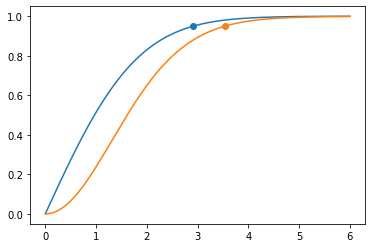

In [126]:
# question 8: tukey's procedure (correct)
xbar = [4010.88, 4029.10, 3960.02]
tukey_calc(xbar,MS_error,mixes*n,v_error,alpha)

In [153]:
# question 9: ANOVA (correct)

data = np.array([[280,1,1],[290,1,1],[285,1,1],
                 [300,1,2],[310,1,2],[295,1,2],
                 [270,1,3],[285,1,3],[290,1,3],
                 [230,2,1],[235,2,1],[240,2,1],
                 [260,2,2],[240,2,2],[235,2,2],
                 [220,2,3],[225,2,3],[230,2,3]])

df = pd.DataFrame(data, columns=['value','A','B'])

formula = 'value ~ C(A) + C(B) + C(A):C(B)'
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print (anovaResults)

             df        sum_sq       mean_sq       F        PR(>F)
C(A)        1.0  13338.888889  13338.888889  192.08  9.568328e-09
C(B)        2.0   1244.444444    622.222222    8.96  4.162152e-03
C(A):C(B)   2.0     44.444444     22.222222    0.32  7.321584e-01
Residual   12.0    833.333333     69.444444     NaN           NaN


In [158]:
# question 9: Fvalues (correct)

alpha = 0.01
MS_a = 13338.888889
MS_b = 622.222222   
MS_ab = 22.222222
MS_error = 69.444444
v_a = 1
v_b = 2

v_ab = v_a * v_b
v_error = 14 - v_ab

# fpcalc(MS_treatment,MS_error,dof_treatment,dof_error,alpha)

print("ab:")
fpcalc(MS_ab, MS_error, v_ab, v_error, alpha)
# Fab < critical_Fab --> Fail to reject the null hypothesis, there does not appear to be interaction effects.

print("\na:")
fpcalc(MS_a, MS_error, v_a, v_error, alpha)
# Fa > critical_Fa --> Reject the null hypothesis, there appears to be a glass type effect.

print("\nb:")
fpcalc(MS_b, MS_error, v_b, v_error, alpha)
# Fb > critical_Fb --> Reject the null hypothesis, there appears to be a phosphor type effect.

ab:
F Signal/Noise = 0.32 
Critical F-value = 6.93
Pvalue = 0.268

a:
F Signal/Noise = 192.08 
Critical F-value = 9.33
Pvalue = 0.000

b:
F Signal/Noise = 8.96 
Critical F-value = 6.93
Pvalue = 0.004


(8.960000054144, 0.0041621519548364905)